# California Housing Prices

### **Business Problem Understanding**

**Context**

Pasar perumahan di California telah mengalami kenaikan harga yang signifikan sejak tahun 1970-an, melampaui pendapatan pribadi dan mengikis keterjangkauan harga. Tren ini didorong oleh pertumbuhan ekonomi yang kuat, terutama di industri berupah tinggi seperti teknologi, yang telah mendorong permintaan akan perumahan di daerah perkotaan pesisir. Namun, pasokan perumahan yang terjangkau tidak dapat mengimbangi, sehingga menyebabkan kenaikan tajam dalam biaya perumahan dan menyulitkan banyak penduduk untuk membeli rumah.

(https://www.rdniehaus.com/app/uploads/2019/08/RDN-Jun18-CA-Housing-Trends.pdf)

**Problem Statement**

Membeli rumah merupakan salah satu keputusan finansial paling signifikan yang akan dihadapi oleh individu. Namun, memahami dinamika harga properti di berbagai wilayah California sering kali menjadi tantangan yang kompleks. Berbagai faktor seperti lokasi, usia bangunan, jumlah kamar, dan karakteristik lingkungan memainkan peran penting dalam menentukan nilai rumah.

Sebagai calon pembeli, penting untuk memiliki pemahaman yang jelas tentang apakah harga rumah yang diinginkan sejalan dengan nilai pasar atau jika terdapat risiko membayar harga yang melebihi nilai wajar. Dalam kondisi pasar yang semakin kompetitif dan beragam, akses terhadap informasi yang akurat menjadi krusial untuk membantu pembeli menemukan properti yang sesuai dengan anggaran dan preferensi mereka.

Pengembangan model prediktif yang mampu memperkirakan nilai median rumah di berbagai distrik di California menjadi fokus utama. Dengan menyediakan estimasi harga yang akurat berdasarkan karakteristik lokal, model tersebut diharapkan dapat meningkatkan kepercayaan diri calon pembeli dalam bernegosiasi dan mendukung mereka dalam membuat keputusan pembelian yang lebih baik berdasarkan informasi yang tepat.

**Goals**

Berdasarkan situasi pasar perumahan di California dan tren kenaikan harga yang tajam, tujuan utama dalam menganalisis dataset California Housing Prices adalah untuk mengembangkan model yang dapat memprediksi harga rumah secara akurat berdasarkan fitur-fitur yang ada. Model ini akan membantu berbagai pihak, termasuk pembeli, penjual, dan investor, dalam membuat keputusan yang lebih baik terkait harga rumah, dengan mempertimbangkan faktor-faktor seperti lokasi, ukuran rumah, usia rumah, dan pendapatan median.

**Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk menemukan pola dan hubungan antara berbagai fitur yang mempengaruhi harga rumah. Ini termasuk memahami bagaimana faktor-faktor seperti lokasi geografis, ukuran rumah, usia rumah, dan pendapatan median berkontribusi terhadap nilai properti di California.

Selanjutnya, kita akan membangun model regresi yang dapat memprediksi harga rumah berdasarkan fitur-fitur yang telah dianalisis. Model ini akan membantu dalam menyediakan alat prediksi yang akurat, sehingga pembeli, penjual, dan investor dapat menentukan harga rumah dengan lebih baik. Dengan demikian, mereka akan dapat membuat keputusan yang lebih informasi dan strategis di pasar perumahan California.

**Metric Evaluation**

Untuk mengevaluasi performa model, akan digunakan beberapa metrik utama, yaitu RMSE, MAE, dan MAPE. RMSE (Root Mean Squared Error) mengukur rata-rata kuadrat dari selisih antara nilai prediksi dan nilai aktual, memberikan indikasi tentang besarnya kesalahan prediksi model dalam unit yang sama dengan data. MAE (Mean Absolute Error) menghitung rata-rata nilai absolut dari kesalahan prediksi, memberikan gambaran tentang seberapa jauh prediksi model dari nilai sebenarnya. MAPE (Mean Absolute Percentage Error) menghitung rata-rata persentase kesalahan, yang membantu dalam menilai akurasi model dalam konteks relatif. Semakin kecil nilai RMSE, MAE, dan MAPE, semakin baik akurasi model dalam memprediksi harga berdasarkan fitur-fitur yang ada.

Selain itu, jika model akhir yang dipilih adalah model linear, nilai R-squared atau adjusted R-squared juga akan dipertimbangkan. R-squared mengukur proporsi varians dalam data yang dapat dijelaskan oleh model, dengan nilai yang semakin mendekati 1 menunjukkan bahwa model semakin baik dalam mencerminkan variasi data yang diamati. Namun, metrik ini tidak berlaku untuk model non-linear, di mana penggunaannya tidak sesuai.

# **Data Understanding**

- Dataset merupakan data house prices di California.
- Setiap baris data merepresentasikan informasi terkait properti.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| longitude | Float | A measure of how far west a house is; a higher value is farther west |
| latitude | Float | A measure of how far north a house is; a higher value is farther north |
| housingMedianAge | Float | Median age of a house within a block; a lower number is a newer building |
| totalRooms | Float | Total number of rooms within a block |
| totalBedrooms | Float | Total number of bedrooms within a block |
| population | Float | Total number of people residing within a block |
| households | Float | Total number of households, a group of people residing within a home unit, for a block |
| medianIncome | Float | Median income for households within a block of houses (measured in tens of thousands of US Dollars) |
| medianHouseValue | Float | Median house value for households within a block (measured in US Dollars) |
| oceanProximity | Object | Location of the house with respect to the ocean/sea |


<br>

## Import packages and Load Data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score


import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('data_california_house.csv')
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


# EDA

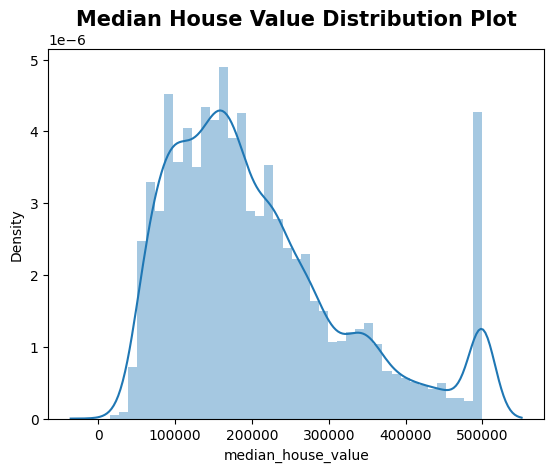

In [4]:
# Distribution plot of Median House Valueplt.figure(figsize=(7, 7))
sns.distplot(df['median_house_value'])
plt.title('Median House Value Distribution Plot', size=15, weight='bold');

Berdasarkan plot distribusi _median house value_ di atas, terlihat bahwa terdapat 'right-skewed distribution'. Dengan kata lain, terdapat skewness positif pada fitur price.

The "median house value" in this dataset represents the median value of all the homes in a particular block group. It's important to note that this isn't necessarily what houses are currently selling for in these areas, as the data is from 1990 and doesn't account for changes in the housing market or inflation since then. Instead, it reflects the central tendency of home values at that time—essentially, it is the middle value when all house values are arranged in order.

# Data Preprocessing

Pada tahap ini dilakukan cleaning data dengan melakukan:
* Check Duplicate
* Handling missing value
* Drop feature yang tidak relevan
* Handling outlier

## Duplicates

In [5]:
num_duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 0


## Missing Value

In [6]:
dataDesc = []
for i in df.columns:
    dataDesc.append([
    i,
    df[i].dtypes,
    df[i].isna().sum(),
    round((df[i].isna().sum()/len(df))*100, 2),
    df[i].nunique(),
    df[i].drop_duplicates().sample(2).values])
pd.DataFrame(data = dataDesc,
            columns=['features',
                    'DataType',
                    'Null',
                    'NullPercentage',
                    'Unique',
                    'Sample'])

,features,DataType,Null,NullPercentage,Unique,Sample
0,longitude,float64,0,0.00,806,"[-117.12, -122.25]"
1,latitude,float64,0,0.00,836,"[33.47, 38.67]"
2,housing_median_age,float64,0,0.00,52,"[10.0, 19.0]"
3,total_rooms,float64,0,0.00,5227,"[2688.0, 4536.0]"
4,total_bedrooms,float64,137,0.95,1748,"[145.0, 450.0]"
5,population,float64,0,0.00,3498,"[2334.0, 2475.0]"
6,households,float64,0,0.00,1649,"[891.0, 3258.0]"
7,median_income,float64,0,0.00,9797,"[4.7475, 8.4709]"
8,ocean_proximity,object,0,0.00,5,"[<1H OCEAN, NEAR BAY]"
9,median_house_value,float64,0,0.00,3548,"[237200.0, 446100.0]"


Pada dataset terdapat missing value pada variabel total_bedrooms, selanjutnya akan ditentukan langkah treatmemnt untuk mengatasinya. 

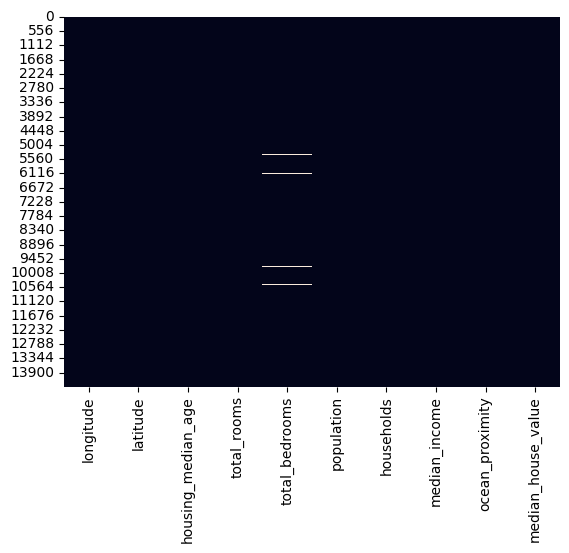

In [7]:
# Heatmap of missing value
sns.heatmap(df.isnull(), cbar=False);

Kolom _total bedrooms_ tidak di drop karena walaupun terdapat kolom lain yang dapat memberikan informasi tentang jumlah ruangan, hal tersebut belum cukup. Karena _total bedrooms_ memberikan informasi terkait semua ruangan yang ada, seperti kamar mandi, dapur, dan sebagainya jika ruangan tersebut dipisahkan oleh tembok (source 1). Saat seseorang hendak memilih rumah, salah satu hal utama yang dilihat _total bedrooms_ (source 2).

**_Source 1_** : https://www.nantucket-ma.gov/DocumentCenter/View/651/Explanation-of-Bedroom-determination?bidId=/1000#:~:text=The%20bedroom%20count%20is%20the,one%20room%20of%20the%20total 

**_Source 2_** : https://www.detik.com/properti/tips-dan-panduan/d-7270647/pertimbangkan-5-hal-ini-buat-memilih-rumah-yang-nyaman-sesuai-kebutuhan

In [8]:
# Drop missing value on total_bedrooms
df = df.dropna(subset=['total_bedrooms'])

**Menghapus missing value pada kolom  _total bedrooms_**

Pada data yang digunakan, kolom _total bedrooms_ memiliki missing valur 0,95% atau dapat disebutkan kurang dari 1%. Berdasarkan **_source_**, jika missing value bernilai dibawah 5% maka missing value tersebut dapat dihapus.

**_Source_**: One rule of thumb is to remove observations if they amount to five percent or less of all values. If we have more missing values, instead of dropping them, we can replace them with a summary statistic like the mean, median, or mode, depending on the context

**_Link Source_** : https://campus.datacamp.com/courses/exploratory-data-analysis-in-python/data-cleaning-and-imputation?ex=1#:~:text=One%20rule%20of%20thumb%20is,This%20is%20known%20as%20imputation


In [9]:
# Re-check missing value
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

Cek feature yang memiliki nilai yang tidak wajar seperti:
* Median harga rumah dengan nilai negatif (pengecualian untuk longitude dapat bernilai negatif)
* Feature memiliki nilai 0, karena tidak ada harga rumah yang gratis dan setiap rumah pasti memiliki minimal 1 ruang tidur

In [10]:
# Descriptive Statistic for Numeric Col
num_features = [feature for feature in df.columns if ((df[feature].dtypes != 'object'))]
df[num_features].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000
mean,-119.567150,35.631365,28.609671,2640.917686,538.260709,1424.772273,499.480470,3.866774,206793.156942
std,2.006374,2.139589,12.606493,2197.192896,423.577544,1151.795857,383.826005,1.890866,115404.371629
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1452.000000,295.000000,784.000000,279.000000,2.569400,119400.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1164.000000,410.000000,3.540300,180000.000000
75%,-118.000000,37.715000,37.000000,3142.000000,647.000000,1722.000000,603.500000,4.736100,263750.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
# Check medain_house_value that has 0 value
df[df['median_house_value'] == 0]['median_house_value'].count()

0

Cek feature yang memiliki nilai yang tidak wajar menunjukkan bahwa:
* Tidak ada feature yang memiliki nilai tidak wajar, tidak ada feature yang memiliki nilai negatif kecuali longitude yang mana merupakan hal yang normal
* Tidak ada feature yang memilii nilai tidak wajar yaitu 0

## Outliers Detection
Deteksi outlier digunakan untuk melihat jika terdapat persebaran data yang tidak wajar yang dapat disebabkan oleh kesalahan dalam entri data, Kesalahan dalam pengukuran data, kesalahan dalam pemrosesan data, kesalahan pengambilan sampel, pencilan yang terjadi secara alami (source). Deteksi outlier dapat dilihat melalui visualisasi boxplot dan melihat nilai IQR untuk menentukan batas atas dan bawah. Setiap pengamatan yang lebih dari 1,5 IQR di bawah Q1 atau lebih dari 1,5 IQR di atas Q3 dianggap sebagai pencilan (source 2).


**_Source 1_** : https://medium.com/@okoropromise94/mastering-data-cleaning-2-managing-outliers-in-data-preprocessing-81f23b990f24

**_Source 2_** : https://online.stat.psu.edu/stat200/lesson/3/3.2

<Axes: >

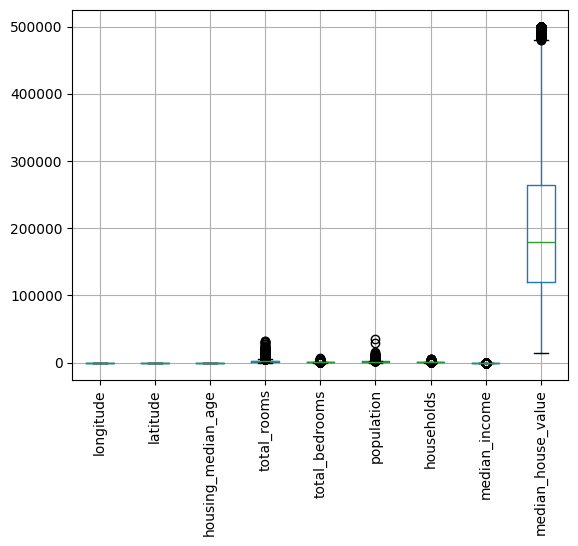

In [12]:
# Boxplot
df.boxplot(rot=90)

**IQR Method** 

One advantage of the IQR method is that it is robust to skewed data distributions. It identifies outliers based on percentiles, making it less sensitive to extreme values. Simple and Effective The IQR method is easy to implement and interpret. It provides a clear range within which most data points should fall, making it a valuable tool for data analysis and quality control (https://medium.com/@pp1222001/outlier-detection-and-removal-using-the-iqr-method-6fab2954315d).

In [13]:
# Function to calculate outliers using IQR
def find_outliers_iqr(df):
    outliers_info = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identifying outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df)) * 100
        
        outliers_info[column] = {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'outlier_count': outlier_count,
            'outlier_percentage': outlier_percentage
        }
    
    return outliers_info

# Find outliers and print the result
outliers_info = find_outliers_iqr(df)
for column, info in outliers_info.items():
    print(f"{column}:")
    print(f"  Lower bound: {info['lower_bound']}")
    print(f"  Upper bound: {info['upper_bound']}")
    print(f"  Outliers: {info['outlier_count']} outliers, {info['outlier_percentage']:.2f}% of data\n")

longitude:
  Lower bound: -127.5
  Upper bound: -112.30000000000001
  Outliers: 0 outliers, 0.00% of data

latitude:
  Lower bound: 28.252499999999994
  Upper bound: 43.39250000000001
  Outliers: 0 outliers, 0.00% of data

housing_median_age:
  Lower bound: -10.5
  Upper bound: 65.5
  Outliers: 0 outliers, 0.00% of data

total_rooms:
  Lower bound: -1083.0
  Upper bound: 5677.0
  Outliers: 905 outliers, 6.32% of data

total_bedrooms:
  Lower bound: -233.0
  Upper bound: 1175.0
  Outliers: 879 outliers, 6.14% of data

population:
  Lower bound: -623.0
  Upper bound: 3129.0
  Outliers: 822 outliers, 5.74% of data

households:
  Lower bound: -207.75
  Upper bound: 1090.25
  Outliers: 836 outliers, 5.84% of data

median_income:
  Lower bound: -0.6806500000000009
  Upper bound: 7.986150000000001
  Outliers: 477 outliers, 3.33% of data

median_house_value:
  Lower bound: -97125.0
  Upper bound: 480275.0
  Outliers: 751 outliers, 5.25% of data



Outlier tergolong banyak saat terdapat 30% dari data merupakan outlier. Hal itu dapat mengindikasikan bahwa terdapat fenomena atau pola menarik yang perlu dianalisis lebih lanjut. Jika outlier yang didapatkan kurang dari nilai tersebut  dapat dilakukan drop value (source). Pada kasus ini, outlier yang didapatkan tidak mencapai 30%, sehingga dapat dilakukan trimming data.

**_source_** : https://www.linkedin.com/pulse/how-handle-outliers-piyush-kumar/

### Trim Outliers
Filtering untuk outliers dilakukan dengan IQR Filtering. Metode trimming yang digunakan di sini adalah filtering berdasarkan batas nilai (Lower Bound & Upper Bound). Data yang berada di luar rentang nilai yang ditentukan (pencilan) akan dihapus.

In [14]:
# Function to trim outliers
def trim_outliers(df, column, lower_bound, upper_bound):
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Trim outliers only for columns with outlier_percentage > 0
for column, info in outliers_info.items():
    if info['outlier_percentage'] > 0:
        df = trim_outliers(df, column, info['lower_bound'], info['upper_bound'])

print("Data after trimming outliers:")
print(df)


Data after trimming outliers:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -119.79     36.73                52.0        112.0            28.0   
1        -122.21     37.77                43.0       1017.0           328.0   
2        -118.04     33.87                17.0       2358.0           396.0   
4        -119.81     36.73                50.0        772.0           194.0   
7        -121.26     38.69                17.0       3917.0           638.0   
...          ...       ...                 ...          ...             ...   
14441    -117.10     32.73                24.0       2927.0           704.0   
14442    -120.06     36.94                19.0        901.0           183.0   
14443    -121.26     38.27                20.0       1314.0           229.0   
14444    -120.89     37.48                27.0       1118.0           195.0   
14447    -115.56     32.80                15.0       1171.0           328.0   

       population  ho

In [15]:
df['median_house_value'].describe()

count     12231.000000
mean     186963.199820
std       93647.499731
min       14999.000000
25%      113300.000000
50%      170500.000000
75%      241300.000000
max      480100.000000
Name: median_house_value, dtype: float64

## Encoding
Pada tahap ini dilakukan encoding untuk mengonversi data kategorikal menjadi bentuk numerik yang dapat diproses oleh algoritma machine learning. Proses ini bertujuan agar model dapat memahami dan memanfaatkan informasi dari fitur kategorikal secara efektif. Map encoding dilakukan untuk encode data ordinal, dalam kasus ini lokasi atau letak rumah semakin dekat dengan ocean memiliki harga yang lebih tinggi. Hal ini disebabkan karena demand yang tinggi dan lokasi yang dekat dengan rekreasi dan watersport. Tidak hanya itu, maintenance yang dilakukan untuk rumah-rumah tersebut lebih khusus, sehingga dibutuhkan biaya yang lebih tinggi (source).

**_source_** : https://homeandtexture.com/beach-house-pros-and-cons/#:~:text=Because%20they're%20in%20such,means%20more%20wear%20and%20tear.

In [16]:
# Values of each categoric
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     5260
INLAND        4083
NEAR OCEAN    1545
NEAR BAY      1341
ISLAND           2
Name: count, dtype: int64

In [17]:
# mapping label encoding using map encode
encoding_map = {
    '<1H OCEAN': 0,
    'NEAR OCEAN': 1,
    'NEAR BAY': 2,
    'ISLAND': 3,
    'INLAND': 4
}

# apply encode to a new column
df['ocean_proximity'] = df['ocean_proximity'].map(encoding_map)

## Feature Selection
Feature selection menggunakan nilai korelasi adalah metode untuk mengidentifikasi fitur yang berkorelasi terhadap target. Tujuannya adalah untuk mengurangi jumlah fitur dalam dataset dan meningkatkan kinerja dan kemampuan interpretasi model.

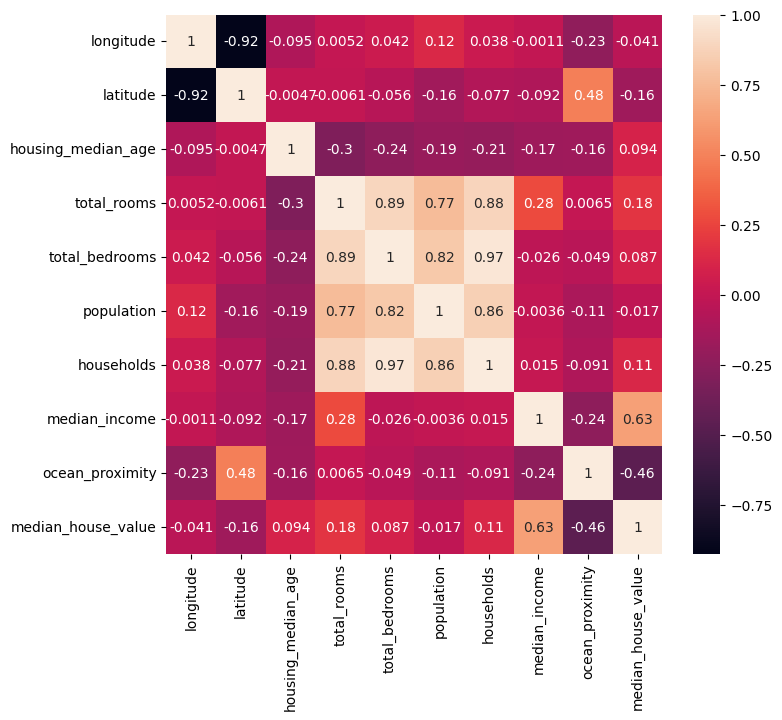

In [18]:
### Cek Korelasi ==> salah satu metode untuk Features Selection
## Pearson
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), annot=True);

Melalui korelasi yang didapatkan pada visualisasi heatmap, ditentukan nilai treshold yaitu 0,1. Penentuan ini dilakukan dengan pertimbangan nilai korelai yang didapatkan, setiap kasus berbeda-beda menentukan bagaimana penentuan treshold yang tentunya berbeda juga untuk tiap kasus. Pada kasus ini, dengan treshold 0,1 dan dengan target _media house value_, feature yang akan digunakan yaitu _latitude_, _total rooms_, _households_, dan _median income_.

# Modelling

In [19]:
# treshold for feature selection based on correlation is set to 0.1
features = ['latitude', 'total_rooms', 'households', 'median_income']
target = ['median_house_value']

In [20]:
# Define X and y from the columns used
X = df[features]
y = df[target]

## Split Train & Test

In [21]:
# Splitting data training and testing with proportion of 80:20
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=51)

## Choose a Benchmark Model
Model yang akan digunakan pada benchmark model yaitu:
* Linear Regression
* Ridge Regression
* Lasso Regression
* Polynomial Regression
* KNN Regressor
* Random Forest Regressor
* Decision Tree

### Find Optimal Degree for Polynomial Regression

In [22]:
# Define a range of polynomial degrees to test
degrees = [1, 2, 3, 4, 5]

# Define a pipeline with polynomial features and linear regression
def create_pipeline(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ])

# Initialize storage for results
results = []

# Perform grid search
for degree in degrees:
    pipeline = create_pipeline(degree)
    
    # Grid search with cross-validation
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid={'poly__degree': [degree]},
        scoring={
            'rmse': make_scorer(mean_squared_error, greater_is_better=False),
            'mae': make_scorer(mean_absolute_error, greater_is_better=False),
            'mape': make_scorer(mean_absolute_percentage_error, greater_is_better=False),
            'r2': make_scorer(r2_score)
        },
        cv=KFold(n_splits=5, shuffle=True, random_state=51),
        refit='r2',  # Choose the metric to refit the best model
        return_train_score=False
    )
    
    grid_search.fit(X_train, y_train)
    
    # Extract exact point scores for the degree
    scores = grid_search.cv_results_
    exact_mape = -scores['mean_test_mape'][0]  # MAPE is negative in scoring
    exact_rmse = -scores['mean_test_rmse'][0]  # RMSE is negative in scoring
    exact_mae = -scores['mean_test_mae'][0]  # MAE is negative in scoring
    exact_r2 = scores['mean_test_r2'][0]
    
    results.append({
        'Degree': degree,
        'MAPE': exact_mape,
        'RMSE': exact_rmse,
        'MAE': exact_mae,
        'R2': exact_r2
    })

In [23]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("Results for Each Polynomial Degree:")
print(results_df)

Results for Each Polynomial Degree:
   Degree      MAPE          RMSE           MAE        R2
0       1  0.343758  4.866228e+09  52757.629462  0.445670
1       2  0.335258  4.663425e+09  51378.466625  0.468729
2       3  0.326106  4.559627e+09  50463.987488  0.480482
3       4  0.321036  4.535134e+09  50235.105015  0.483263
4       5  0.311426  4.470071e+09  49596.496076  0.490732


Degree yang akan digunakan pada regresi polinomial yaitu 3, karena seltelah degree 3, metric tidak menunjukkan perubahan yang signifikan untuk degree lebih dari 3. 

### Benchmark Model

In [24]:
# Define algorithms
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=51)
rf = RandomForestRegressor(random_state=51)
lasso = Lasso(alpha=1.0)  
ridge = Ridge(alpha=1.0)  

poly = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('linear', LinearRegression())
])

# Models with log transformation
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_lasso = TransformedTargetRegressor(lasso, func=np.log, inverse_func=np.exp)
log_ridge = TransformedTargetRegressor(ridge, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

In [25]:
# Candidate models
models = [log_lr, log_knn, log_dt, log_rf, log_lasso, log_ridge, poly]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

score_r2 = []
nilai_mean_r2 = []
nilai_std_r2 = []

# Find the best model based on each metric
for i in models:
    crossval = KFold(n_splits=5, shuffle=True, random_state=51)

    # scaling for polynomial features
    if i == poly:
        estimator = Pipeline([
            ('scaler', scaler),
            ('poly', i.named_steps['poly']),
            ('model', i.named_steps['linear'])
        ])
    else:
        estimator = Pipeline([
            ('scaler', scaler),
            ('model', i)
        ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
    )
    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
    )
    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
    )
    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

    # R² Score
    model_cv_r2 = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='r2', 
        error_score='raise'
    )
    score_r2.append(model_cv_r2)
    nilai_mean_r2.append(model_cv_r2.mean())
    nilai_std_r2.append(model_cv_r2.std())

In [26]:
# Evaluate results
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'Lasso Regression', 'Ridge Regression', 'Polynomial Regression (degree 3)'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape,
    'Mean_R2': nilai_mean_r2,
    'Std_R2': nilai_std_r2
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Mean_R2,Std_R2
0,Linear Regression,-72374.883449,2310.924575,-52228.768085,1356.561617,-0.311330,0.004648,0.402634,0.035223
1,KNN Regressor,-69868.333089,2123.727758,-50396.219060,1361.961560,-0.294322,0.003851,0.443201,0.034016
2,DecisionTree Regressor,-86612.963370,2255.272688,-61223.707941,1464.424102,-0.372779,0.008976,0.145324,0.023541
3,RandomForest Regressor,-64334.949152,2228.599204,-45192.760753,1041.872868,-0.262650,0.001478,0.527911,0.030738
4,Lasso Regression,-96496.258398,1451.978913,-74327.780959,845.667310,-0.487315,0.010963,-0.060980,0.009912
5,Ridge Regression,-72373.252255,2310.971841,-52228.271567,1356.594405,-0.311337,0.004647,0.402661,0.035219
6,Polynomial Regression (degree 3),-67496.054087,1977.408458,-50463.987488,1206.258252,-0.326106,0.005431,0.480482,0.028889


Hasil dari benchmark model, didapatkan 2 algoritma teratas untuk setiap metrik RMSE, MAE dan MAPE, R2 ditunjukkan sebagai berikut:

RMSE -> Random Forest - Polynomial 3 Degree

MAE -> Random Forest - KNN

MAPE -> Random Forest - KNN

R2 -> Random Forest - Polynomial 3 Degree

Selanjutnya akan dilakukan prediksi pada data test untuk algoritma yang disebutkan diatas. 

### Predict to Test Set with the Benchmark Model

Prediksi pada test set dengan menggunakan model Random Forest, Polynomial 3 derajat, dan KNN

In [27]:
# Define models
models = {
    'RandomForest': RandomForestRegressor(random_state=51),
    'KNN': KNeighborsRegressor(),
    'Polynomial': Pipeline([
        ('poly', PolynomialFeatures(degree=3)),
        ('linear', LinearRegression())
    ])
}

# Initialize metrics lists
score_rmse = []
score_mae = []
score_mape = []
score_r2 = []

# Benchmark models
for name, model in models.items():
    pipeline_steps = []
    
    if name == 'Polynomial':
        pipeline_steps.append(('model', model))
    else:
        pipeline_steps.extend([
            ('scaler', scaler),
            ('model', model)
        ])
    
    model_pipeline = Pipeline(pipeline_steps)
    
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    
    # Calculate metrics
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    score_r2.append(r2_score(y_test, y_pred))

In [28]:
# Create DataFrame for results
score_before_tuning = pd.DataFrame({
    'RMSE': score_rmse,
    'MAE': score_mae,
    'MAPE': score_mape,
    'R^2': score_r2
}, index=models.keys())

print(score_before_tuning)

                      RMSE           MAE      MAPE       R^2
RandomForest  62905.605812  46227.289003  0.284311  0.546246
KNN           69119.185481  51317.809563  0.311607  0.452178
Polynomial    66096.121511  49460.545981  0.312955  0.499050


### Hyperparameter Tuning for Random Forest

Algoritma Random Forest bekerja dengan menggabungkan banyak pohon keputusan (decision trees) untuk menghasilkan prediksi yang lebih akurat dan stabil. Proses dimulai dengan membuat beberapa pohon keputusan menggunakan teknik bootstrap, di mana data latih dibagi menjadi beberapa subset acak dengan penggantian. Pada setiap node dari setiap pohon, sejumlah fitur acak dipertimbangkan untuk pembagian, yang membantu menciptakan variasi antar pohon dan mengurangi risiko overfitting. Setelah pohon-pohon keputusan dilatih, masing-masing pohon digunakan untuk membuat prediksi independen terhadap data baru. Prediksi akhir untuk regresi diperoleh dengan menghitung rata-rata dari semua prediksi yang dihasilkan oleh pohon-pohon tersebut. Penggabungan prediksi ini membantu mengurangi variabilitas dan bias, menghasilkan model yang lebih mampu melakukan generalisasi terhadap data baru. Meskipun Random Forest memiliki keuntungan dalam ketahanan terhadap overfitting dan kemampuannya menangani data dengan fitur yang tinggi serta interaksi non-linear, model ini bisa lebih lambat dan membutuhkan lebih banyak memori dibandingkan dengan model sederhana. Interpretasi hasilnya juga lebih kompleks dibandingkan dengan pohon keputusan tunggal. Dalam konteks prediksi harga rumah di California, Random Forest akan menghasilkan estimasi harga yang lebih akurat dengan menggabungkan prediksi dari banyak pohon keputusan.

In [29]:
# Define the hyperparameters to tune
hyperparam_space_rf = {
    'model__n_estimators': list(np.arange(100, 301, 50)),           # Number of trees in the forest
    'model__max_features': ['auto', 'sqrt', 'log2'],                # Number of features to consider when looking for the best split
    'model__max_depth': list(np.arange(10, 51, 10)),                # Maximum depth of the tree
    'model__min_samples_split': list(np.arange(2, 21, 2)),          # Minimum number of samples required to split an internal node
    'model__min_samples_leaf': list(np.arange(1, 21, 2)),           # Minimum number of samples required to be at a leaf node
    'model__bootstrap': [True, False]                               # Whether bootstrap samples are used when building trees
}

# Create the Random Forest model
rf = RandomForestRegressor(random_state=51)

# Create the pipeline for Random Forest
estimator_rf = Pipeline([
    ('scaler', scaler),
    ('model', rf)
])

# Setup cross-validation
crossval = KFold(n_splits=5, shuffle=True, random_state=51)

# Hyperparameter tuning with RandomizedSearchCV
random_rf = RandomizedSearchCV(
    estimator_rf,
    param_distributions=hyperparam_space_rf,
    n_iter=50,  # Number of random combinations to try
    cv=crossval,
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs=-1,
    refit='neg_root_mean_squared_error',  # Optimize for RMSE
    random_state=1
)

# Fit the model on the training data
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=51, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model',
                                              RandomForestRegressor(random_state=51))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'model__bootstrap': [True, False],
                                        'model__max_depth': [10, 20, 30, 40,
                                                             50],
                                        'model__max_features': ['auto', 'sqrt',
                                                                'log2'],
                                        'model__min_samples_leaf': [1, 3, 5, 7,
                                                                    9, 11, 13,
                                                                    15, 17,
                                                                    19],
                                        'model__min_samples_split': [2, 4, 6, 8,
                                                                     10, 12, 14,
                                                                     16, 18,
                                                                     20],
                                        'model__n_estimators': [100, 150, 200,
                                                                250, 300]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [30]:
# View the results in a DataFrame, sorted by the best metrics
results_df = pd.DataFrame(random_rf.cv_results_)
sorted_results = results_df.sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error'])
# print(sorted_results.head())

# Print the best score and parameters
print('Random Forest')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

Random Forest
Best_score: -63165.46014075643
Best_params: {'model__n_estimators': 200, 'model__min_samples_split': 6, 'model__min_samples_leaf': 3, 'model__max_features': 'sqrt', 'model__max_depth': 30, 'model__bootstrap': True}


### Performance Comparison

In [31]:
# Model Random Forest
model = {'RandomForest': RandomForestRegressor(random_state=51)}

# Define model against the best estimator
rf_tuning = random_rf.best_estimator_

# Fit the model
rf_tuning.fit(X_train, y_train)

# Predict test set
y_pred_rf_tuning = rf_tuning.predict(X_test)

# Save metrics RMSE, MAE & MAPE after tuning
rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)
r2_rf_tuning = r2_score(y_test, y_pred_rf_tuning)

score_after_tuning_rf = pd.DataFrame({
    'RMSE': rmse_rf_tuning,
    'MAE': mae_rf_tuning,
    'MAPE': mape_rf_tuning,
    'R^2': r2_rf_tuning
}, index=model.keys())

print("Performance Comparison")

# Before hyperparameter tuning
print("Before Hyperparameter Tuning")
print(score_before_tuning.loc['RandomForest'])

# After hyperparameter tuning
print("After Hyperparameter Tuning")
print(score_after_tuning_rf.T)

Performance Comparison
Before Hyperparameter Tuning
RMSE    62905.605812
MAE     46227.289003
MAPE        0.284311
R^2         0.546246
Name: RandomForest, dtype: float64
After Hyperparameter Tuning
      RandomForest
RMSE  62221.226510
MAE   45930.367225
MAPE      0.282676
R^2       0.556065


Hasil dari test set menunjukkan bahwa model dengan Random Forest memiliki nilai dari metrik RMSE, MAE, MAPE terkecil dan R2 terbesar. Hal ini menunjukkan bahwa error yang dihasilkan lebih kecil daripada model lainnya. Sehingga model ini selanjutnya akan dilakukan tuning untuk meningkatkan kebaikan model.

In [32]:
import pickle

# Save the tuned model using Pickle
with open('rf_tuning_model.pkl', 'wb') as file:
    pickle.dump(rf_tuning, file)

## Feature Importance in Model

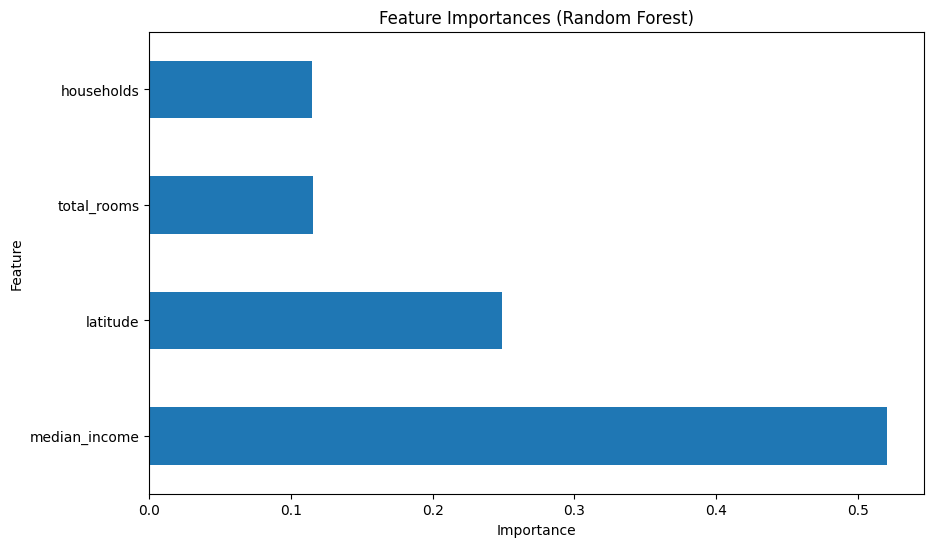

In [33]:
feature_names = ['latitude', 'total_rooms', 'households', 'median_income']

# Extract feature importances from the tuned Random Forest model
feature_importances_rf = rf_tuning['model'].feature_importances_

# Create a DataFrame for feature importances
feature_imp_rf = pd.Series(feature_importances_rf, index=feature_names).sort_values(ascending=False).head()

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_imp_rf.plot(kind='barh', title='Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Kesimpulan

Berdasarkan pemodelan yang sudah dilakukan, fitur 'median_income' dan 'latitude' menjadi fitur yang paling berpengaruh terhadap 'median house price'.

 Dalam evaluasi model, digunakan metrik RMSE, MAE, MAPE, dan R2. Berdasarkan nilai MAPE yang diperoleh setelah proses tuning hyperparameter, sekitar 28%, dapat disimpulkan bahwa saat model diterapkan untuk memprediksi harga median rumah di California dalam rentang harga yang sesuai dengan data pelatihan (maksimum harga 480.100 USD), prediksi model akan memiliki deviasi rata-rata sekitar 28% dari harga sebenarnya.

 Namun, terdapat kemungkinan bahwa harga prediksi dapat meleset lebih besar, mengingat adanya bias yang cukup signifikan, yang terlihat jelas dalam visualisasi perbandingan antara harga aktual dan prediksi. Bias ini disebabkan oleh keterbatasan fitur dalam dataset yang tidak sepenuhnya mencerminkan semua aspek properti yang relevan.

 Oleh karena itu, model ini masih berpotensi untuk diperbaiki guna meningkatkan akurasi prediksi dengan mempertimbangkan tambahan atau perbaikan fitur yang lebih representatif. Hal ini dapat dilakukan dengan menambah fitur yang memiliki korelasi tinggi terhadap harga rumah. Selain itu dapat digunakan ensemble model atau kombinasi dengan algoritma lain sehingga didapatkan akurasi yang lebih baik. 

# Rekomendasi

Hal-hal yang dapat dilakukan untuk pengembangan model diantaranya:

1. Analisis kesalahan prediksi dengan melihat hubungan antara kesalahan dalam kategori dengan setiap variabel independen untuk mengidentifikasi faktor yang menyebabkan kesalahan tinggi. Dengan memahami variabel mana yang berkontribusi pada kesalahan, dapat dilakukan feature engineering untuk meningkatkan model.

2. Menambahkan fitur-fitur baru yang lebih berkorelasi dengan target ('median house value'), seperti kondisi properti, luas bangunan atau lokasi relatif terhadap atraksi (rekreasi) terdekat untuk membantu model menangkap informasi yang lebih relevan.

3. Mengeksplorasi dengan model lain yang lebih kompleks seperti Gradient Boosting Machines (GBM) atau XGBoost yang mungkin memberikan performa lebih baik dibandingkan Random Forest.

4. Melakukan analisis sentimen jika terapat pembaruan data dengan penambahan rating terkait nilai keseluruhan lokasi rumah terhadap lautan, kota, atraksi, kondisi lingkungan dan kondisi bangunan. Hal tersebut bertujuan untuk meningkatkan akurasi prediksi harga. 